In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

from lasso import *

import matplotlib.pyplot as plt
plt.style.use('dark_background')

/home/sauxpa/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sauxpa/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sauxpa/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,7),
}
plt.rcParams.update(params)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
scaler = StandardScaler()
housing = fetch_california_housing()
housing_data = scaler.fit_transform(housing.data)
housing_target = housing.target
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing_data]

In [4]:
n_epochs = int(2e3)
learning_rate = 0.01

In [5]:
model = Lasso()
model.X = housing_data_plus_bias
## VERY IMPORTANT : reshape y, 
## otherwise tf will do some messy inline reshaping, slowing down 50x
model.y = housing_target.reshape(-1,1)
model.n_epochs = n_epochs
model.verbose = False
model.optim_params = {
    'optimizer_name': 'adam',
    'learning_rate': learning_rate,
}

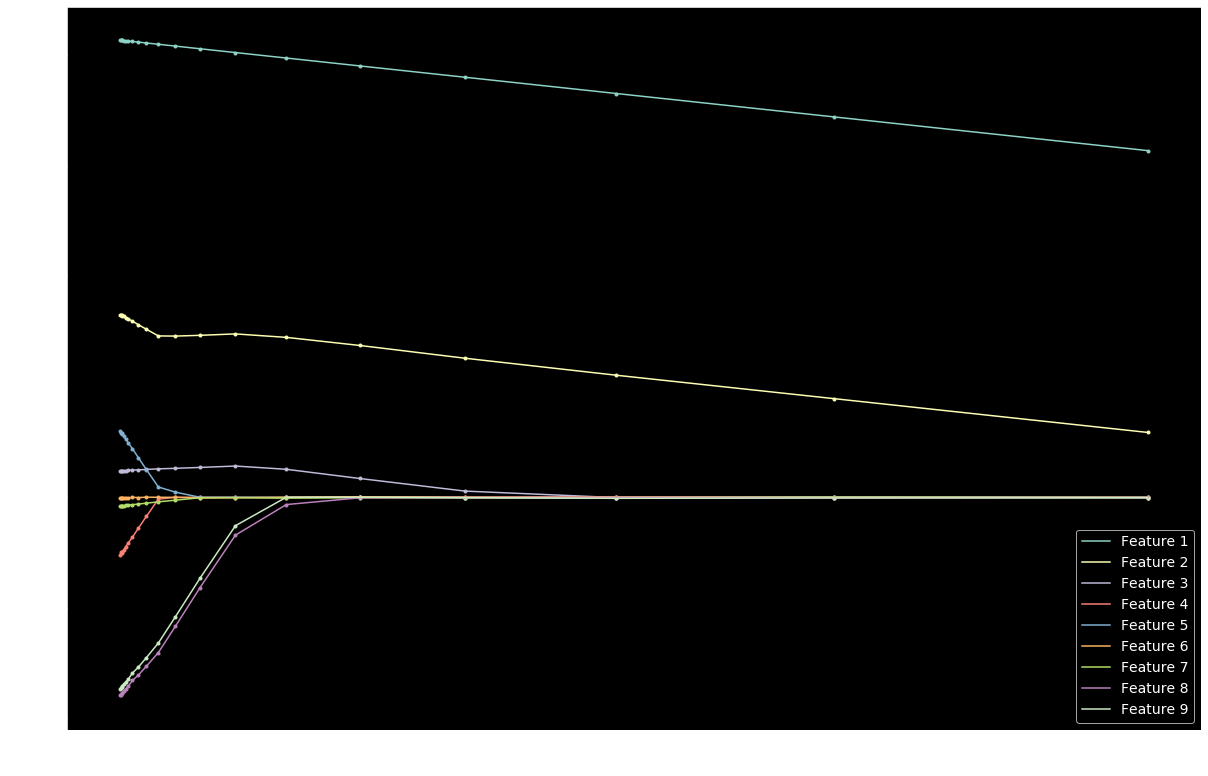

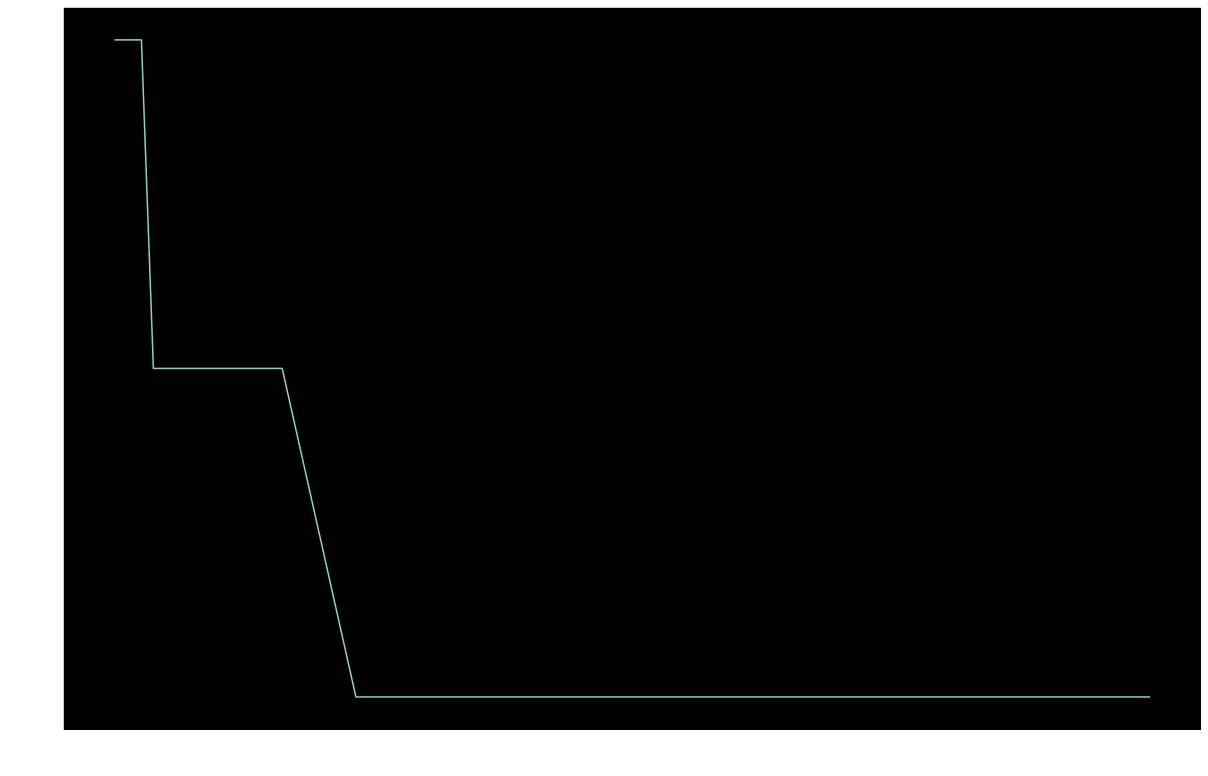

In [7]:
path, active_features_path, grid = model.lasso_path(n_l1_strength=20,
                                                    plot_path=True, 
                                                    plot_active_features_path=True, 
                                                    threshold=1e-1)